# Training the Model

In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

In [2]:
import pandas as pd
import numpy as np
import random
import os

### Importing Data

In [3]:
#Load Data
Data_train = pd.read_csv("train.csv") # Train data
Data_test = pd.read_csv("test.csv")  # Test data

In [4]:
# Convert to DataFrame
df_train = pd.DataFrame(Data_train)
df_test = pd.DataFrame(Data_test)

In [5]:
# Shuffle Rows
df_train = df_train.sample(frac = 1)
df_test  = df_test.sample(frac=1)

In [6]:
# Convert to np array
dataset_train = np.array(df_train)
dataset_test = np.array(df_test)

### Splitting in data and labels

In [7]:
train_data = dataset_train[:,1:]    # Data
train_label = dataset_train[:,0]   # Labels

In [8]:
test_data  = dataset_test[:,1:]     # Data
test_label = dataset_test[:,0]     # Labels

### Normalize Data

In [9]:
train_data  = train_data  / 255.    # Train
test_data   = test_data   / 255.    # Test

### Preparing labels

In [10]:
# Dictionary for labels
labels = {}

In [11]:
# Path to classes
path = 'Dataset/Test'

In [12]:
# Adding lables in Dictionary
i = 0
for folder in os.listdir(path):
    fold = folder[13:]
    labels[i] = fold
    i += 1

In [13]:
labels

{0: 'na',
 1: 'adna',
 2: 'gya',
 3: 'yaw',
 4: 'pha',
 5: 'ma',
 6: 'ja',
 7: 'gha',
 8: 'tra',
 9: 'dhaa',
 10: 'ka',
 11: 'waw',
 12: 'bha',
 13: 'thaa',
 14: 'daa',
 15: 'tabala',
 16: 'kha',
 17: 'kna',
 18: 'ga',
 19: 'pa',
 20: 'ra',
 21: 'yna',
 22: 'patalosaw',
 23: 'dha',
 24: 'cha',
 25: 'taamatar',
 26: 'petchiryakha',
 27: 'tha',
 28: 'da',
 29: 'motosaw',
 30: 'ha',
 31: 'chhya',
 32: 'chha',
 33: 'ba',
 34: 'la',
 35: 'jha'}

### Replacing class name by Integers

In [14]:
y_test  = []
y_train = []

In [15]:
y_test  = test_label
y_train = train_label

In [16]:
for i in range(len(y_test)):
    for j in range(len(labels)):
        if labels[j] == y_test[i]:
            y_test[i] = j
            break

In [17]:
for i in range(len(y_train)):
    for j in range(len(labels)):
        if labels[j] == y_train[i]:
            y_train[i] = j
            break

In [18]:
# Test
print (y_test.shape)    
print (test_data.shape)

(10799,)
(10799, 1024)


In [19]:
# Train
print (y_train.shape)
print (train_data.shape)

(61199,)
(61199, 1024)


In [20]:
# Adding one more channel to labels
y_tests = y_test.reshape(y_test.shape[0],1)
y_tests = y_tests.T
y_trains = y_train.reshape(y_train.shape[0],1)
y_trains = y_trains.T

### One-hot Encode

In [21]:
from keras.utils import np_utils

In [22]:
y_test = np_utils.to_categorical(y_tests)
y_train = np_utils.to_categorical(y_trains)

### Reshaping Variables

In [23]:
y_test  = y_test.reshape(y_test.shape[1],y_test.shape[2])
y_train = y_train.reshape(y_train.shape[1],y_train.shape[2])

In [24]:
data_test  = test_data.reshape(test_data.shape[0], 32, 32, 1)
data_train = train_data.reshape(train_data.shape[0], 32, 32, 1)

In [25]:
data_test = np.asarray(data_test).astype(int)
data_train = np.asarray(data_train).astype(int)

### Model Building

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.callbacks import ModelCheckpoint

In [27]:
# Number of classes
classes = 36

In [28]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(32, 32, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Conv2D(64, (5, 5), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(classes, activation='softmax'))

### Compiling Model

In [29]:
# loss=categorical_crossentropy
# optimizer= adam

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
# Creating Checkpoint

In [32]:
filepath = "hindi_character_recognition.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]

### Training Model

In [43]:
history = model.fit(data_train, y_train, validation_data=(data_test, y_test), epochs=25, batch_size=64, callbacks=callbacks_list)

Epoch 1/25
957/957 [==============================] - 22s 23ms/step - loss: 0.1561 - accuracy: 0.9484 - val_loss: 0.3071 - val_accuracy: 0.9178
Epoch 2/25
957/957 [==============================] - 22s 23ms/step - loss: 0.1463 - accuracy: 0.9507 - val_loss: 0.3206 - val_accuracy: 0.9145
Epoch 3/25
957/957 [==============================] - 22s 23ms/step - loss: 0.1442 - accuracy: 0.9519 - val_loss: 0.3158 - val_accuracy: 0.9175
Epoch 4/25
957/957 [==============================] - 22s 23ms/step - loss: 0.1406 - accuracy: 0.9533 - val_loss: 0.3031 - val_accuracy: 0.9218
Epoch 5/25
957/957 [==============================] - 22s 23ms/step - loss: 0.1386 - accuracy: 0.9538 - val_loss: 0.3035 - val_accuracy: 0.9199
Epoch 6/25
957/957 [==============================] - 22s 23ms/step - loss: 0.1309 - accuracy: 0.9561 - val_loss: 0.3044 - val_accuracy: 0.9209
Epoch 7/25
957/957 [==============================] - 22s 23ms/step - loss: 0.1271 - accuracy: 0.9581 - val_loss: 0.3235 - val_accuracy:

### Evaluate model on test dataset

In [44]:
scores = model.evaluate(data_test, y_test, verbose=0)

In [45]:
print("Model Accuracy: %.2f%%" % (scores[1] * 100))

Model Accuracy: 91.89%


### Visualizing the Results

In [46]:
import matplotlib.pyplot as plt


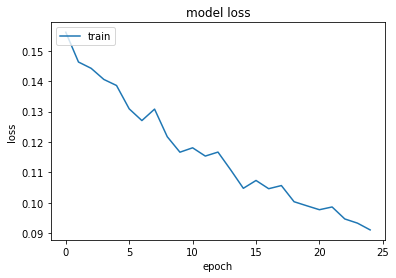

In [48]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Loss')
plt.show()

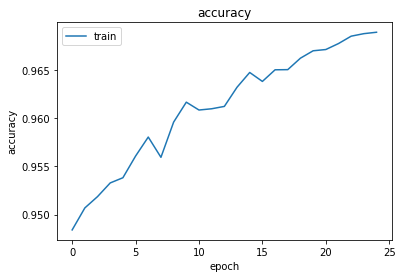

In [49]:
plt.plot(history.history['accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Accuracy')
plt.show()

### Saving the Model

In [45]:
model.save('Hindi_charcter_recognition.h5')